In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.shape

(11162, 17)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [8]:
for column in df.columns:
    print(column,df[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


In [9]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ["deposit"]))]

In [10]:
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [11]:
for feature in categorical_features:
    print('the feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

the feature is job and number of categories are 12
the feature is marital and number of categories are 3
the feature is education and number of categories are 4
the feature is default and number of categories are 2
the feature is housing and number of categories are 2
the feature is loan and number of categories are 2
the feature is contact and number of categories are 3
the feature is month and number of categories are 12
the feature is poutcome and number of categories are 4


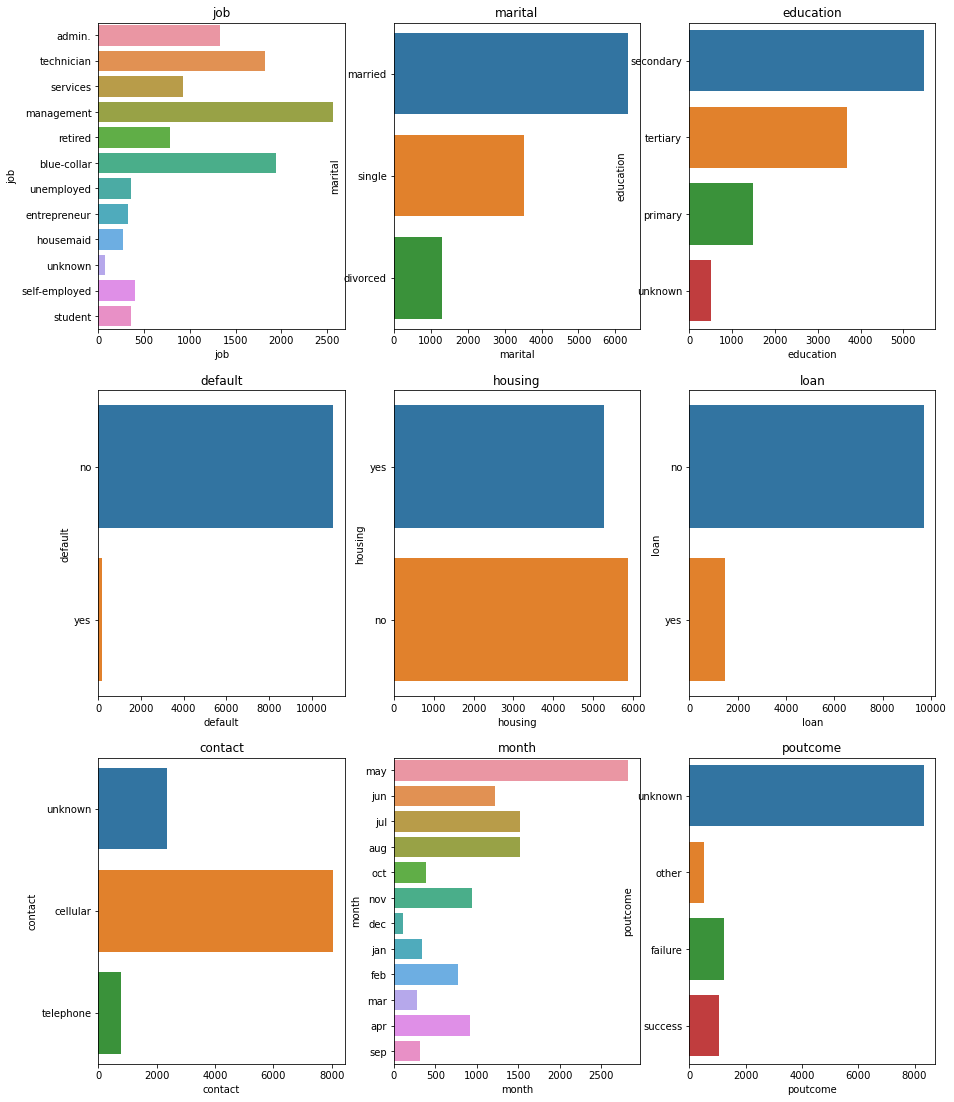

In [12]:
plt.figure(figsize=(15,80),facecolor='white')
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()    

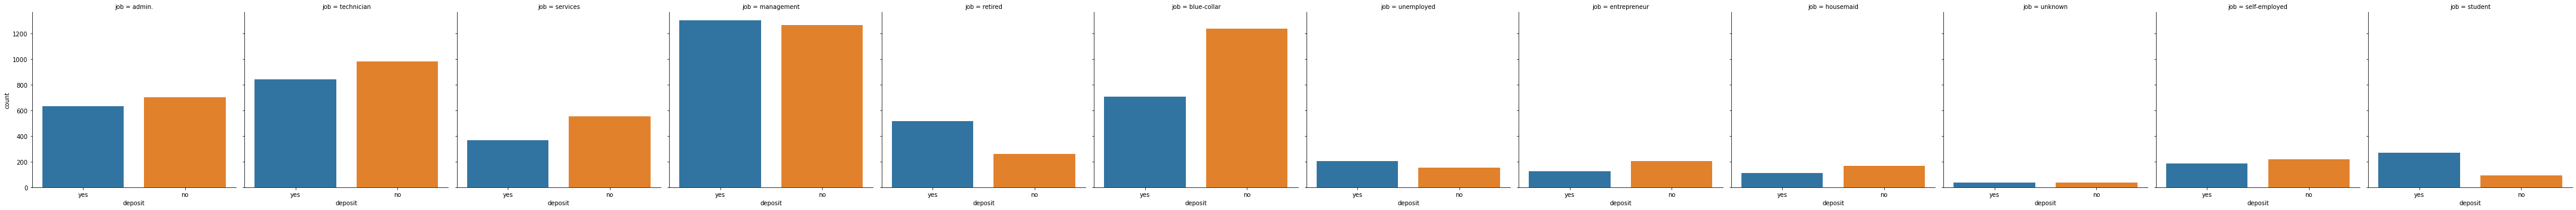

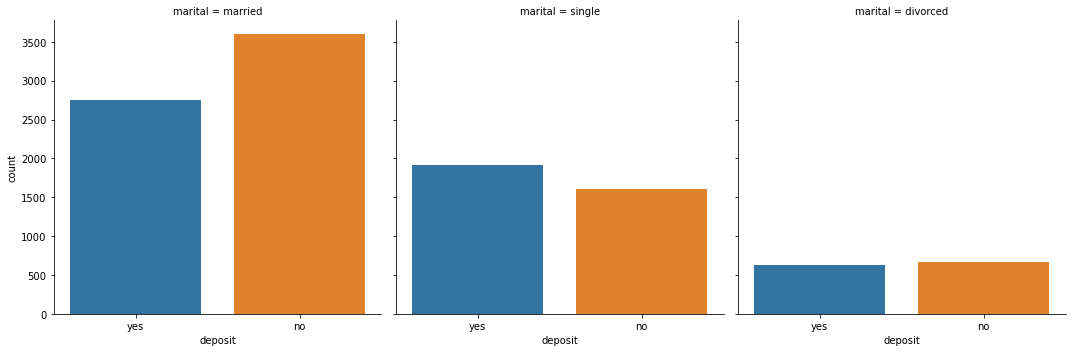

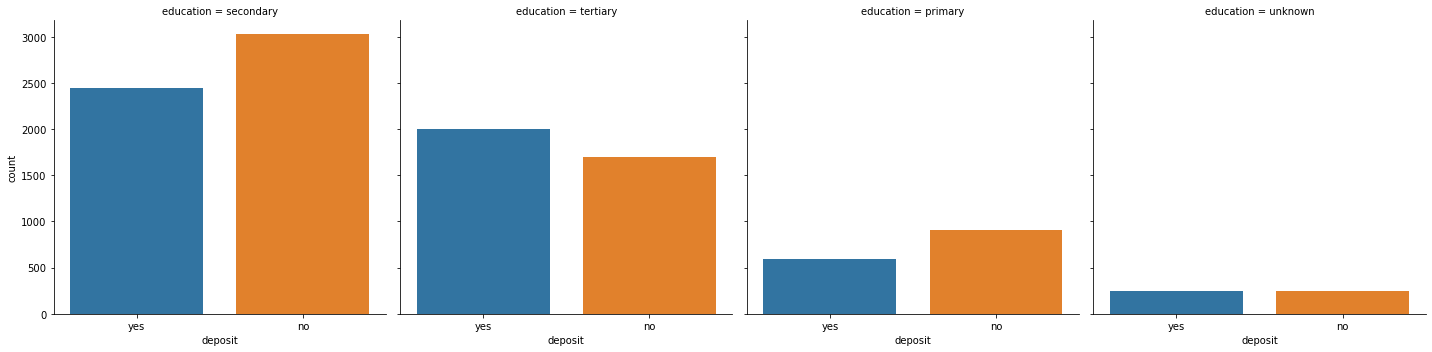

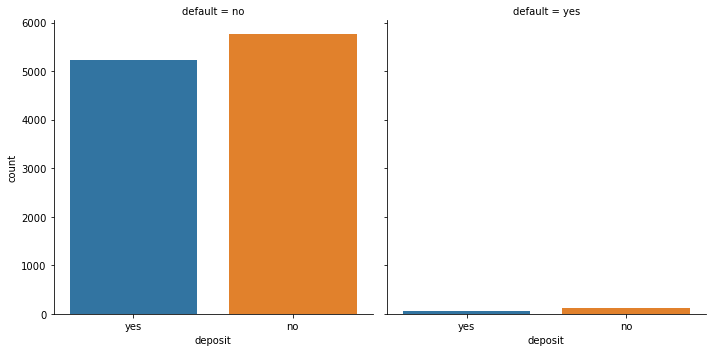

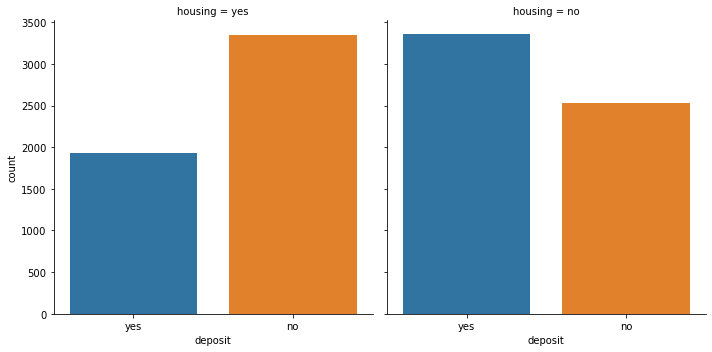

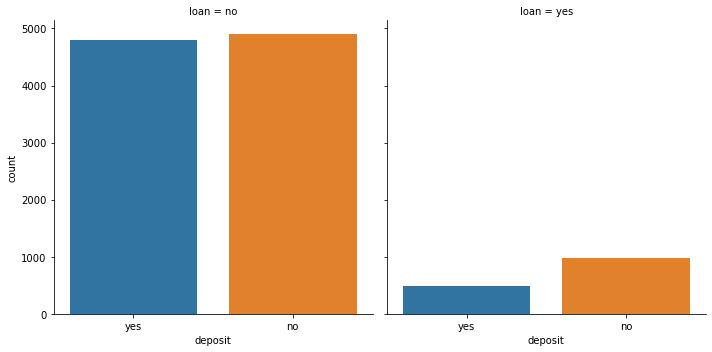

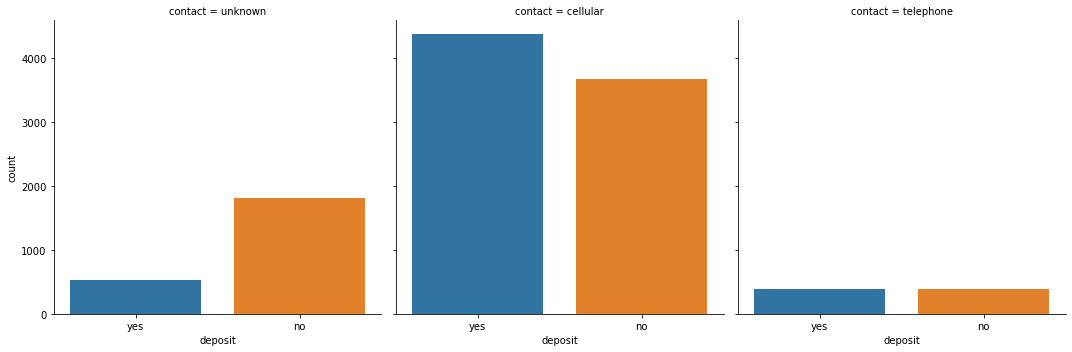

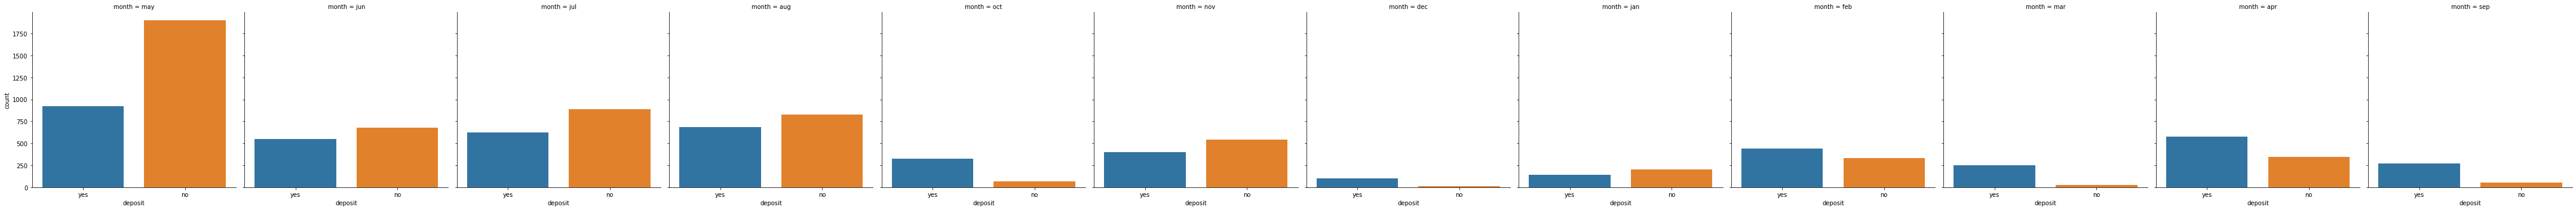

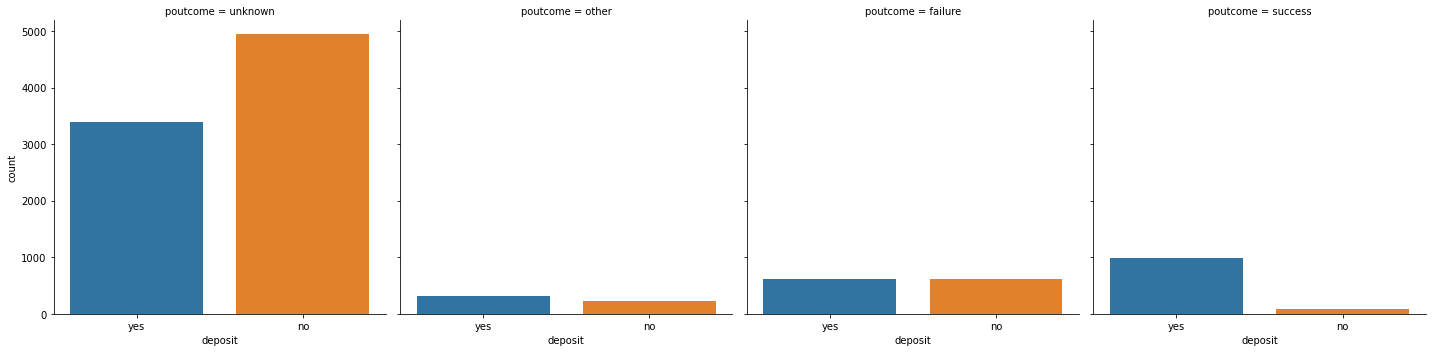

In [13]:
for categorical_feature in categorical_features:
    sns.catplot(x='deposit',col=categorical_feature, kind='count',data=df)
plt.show()    

In [14]:
for feature in categorical_features:
    print(df.groupby(['deposit',feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

In [15]:
numerical_features=[feature for feature in df.columns if ((df[feature].dtypes!='O') & (feature not in ["deposit"]))]
print('Number of numerical variables:',len(numerical_features))

df[numerical_features].head()

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [16]:
discrete_feature=[feature for feature in numerical_features if len (df[feature].unique())<25]
print("Discrete Variable Count:{}".format(len(discrete_feature)))

Discrete Variable Count:0


In [17]:
continous_features=[feature for featur in numerical_features if feature not in discrete_feature+['deposite']]
print("continuous feature count{}".format(len(continous_features)))

continuous feature count7


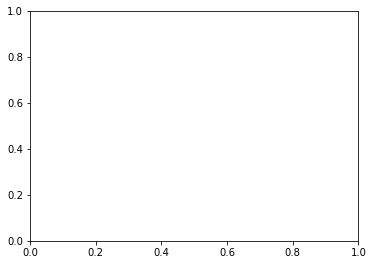

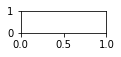

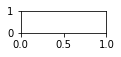

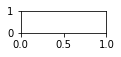

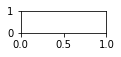

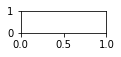

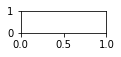

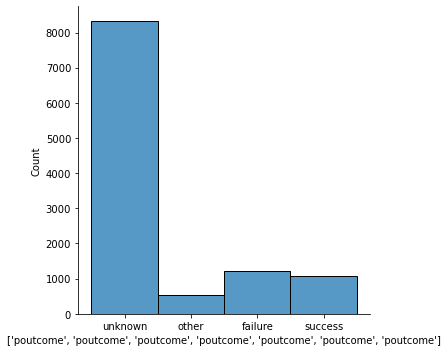

In [18]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber =1
for continuous_feature in continous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.displot(df[continuous_feature])
    plt.xlabel(continous_features)
    plotnumber+=1
plt.show()    

TypeError: Neither the `x` nor `y` variable appears to be numeric.

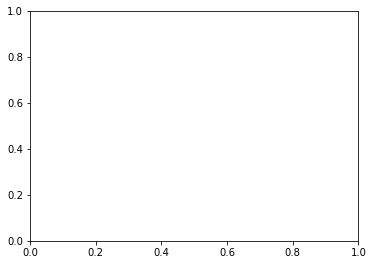

In [79]:
plt.figure(figsize=(20,60),facecolor='white')

plotnumber=1
for feature in continous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='deposit',y=df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()    

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ELCOT\anaconda3\lib\si

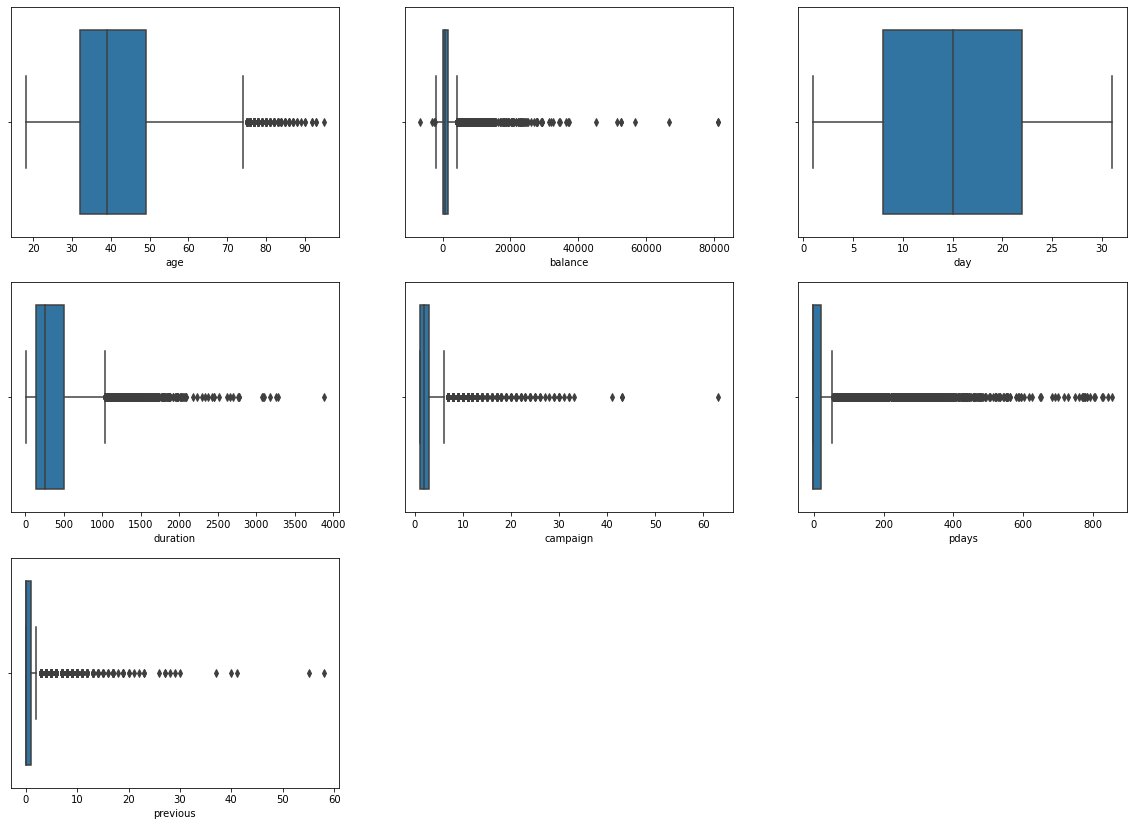

In [20]:
plt.figure(figsize=(20,60),facecolor="white")
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()    

<AxesSubplot:>

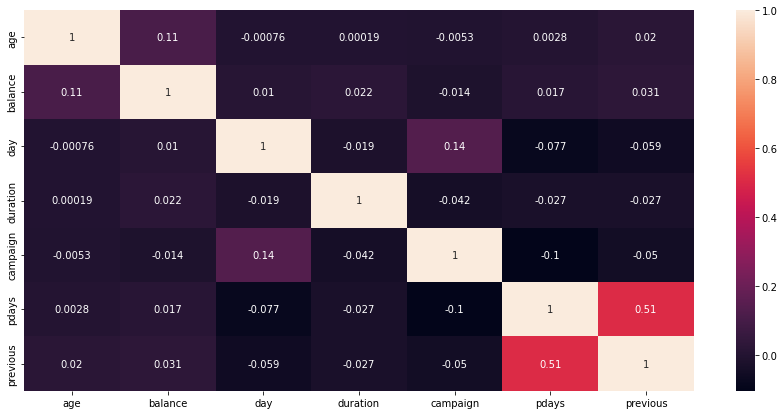

In [21]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

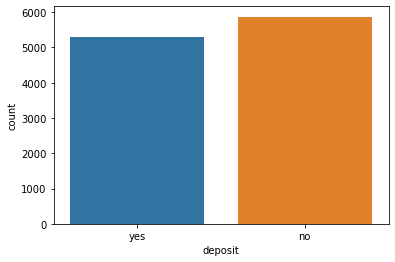

In [22]:
sns.countplot(x='deposit',data=df)
plt.show()

In [108]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

In [23]:
df2=df.copy()

In [24]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [25]:
df2.shape

(11162, 17)

In [26]:
df2.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [27]:
df2.drop(['default'],axis=1,inplace=True)

In [28]:
df2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [29]:
df2.drop(['pdays'],axis=1,inplace=True)

In [30]:
df2.groupby('age',sort=True)['age'].count()

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [31]:
df2.groupby(['deposit','balance'],sort=True)['balance'].count()

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [32]:
df2.groupby(['deposit','balance'],sort=True)['duration'].count()

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: duration, Length: 5082, dtype: int64

In [33]:
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [34]:
df3=df2[df2['campaign']<33]

In [35]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [36]:
df3.groupby(['deposit','campaign'],sort=True)['previous'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [37]:
df4=df3[df3['previous']<31]

In [38]:
cat_columns = ['job','marital','education','contact','month','poutcome']
for col in cat_columns:
    df4 = pd.concat([df4.drop(col,axis=1),pd.get_dummies(df4[col],prefix=col,prefix_sep='_',drop_first=True,dummy_na=False)])

In [39]:
df4.columns

Index(['age', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign',
       'previous', 'deposit', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [40]:
bool_columns = ['housing','loan','deposit']
for col in bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col,axis=1,inplace=True)

In [41]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59.0,2343.0,5.0,1042.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
1,56.0,45.0,5.0,1467.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
2,41.0,1270.0,5.0,1389.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
3,55.0,2476.0,5.0,579.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
4,54.0,184.0,5.0,673.0,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1


In [42]:
x = df4.drop(['deposit_new'],axis=1)
y = df4['deposit_new']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
len(x_train)

570982

In [44]:
len(x_test)

142746

model selection

In [54]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [51]:
pip install xgboost

In [59]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=x_train,y=y_train,cv=5)
print(model_score)
print(model_score.mean())

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

[nan nan nan nan nan]
nan


C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

In [61]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=x_train,y=y_train,cv=5)
print(model_score)
print(model_score.mean())

[0.99686507 0.99692636 0.99697888 0.99679498 0.99684753]
0.9968825636774833


In [77]:
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators':[10,50,100,130],
            'criterion':['geni','entropy'],
            'max_depth':range(2,4,1),
            'max_features':['auto','log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
            'learning_rate':[0.5,0.1,0.01,0.001],
            'max_depth':[3,5,10,20],
            'n_estimators':[10,50,100,200]
        }
    }
}

In [78]:
score=[]
for model_name,mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score':model_selection.best_score_,
        'best_params':model_selection.best_params_
    })

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(X, accept_sparse=accept_spars

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Model Building

In [62]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [63]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [75]:
model_xgb.score(x_test,y_test)

0.9970436999985989

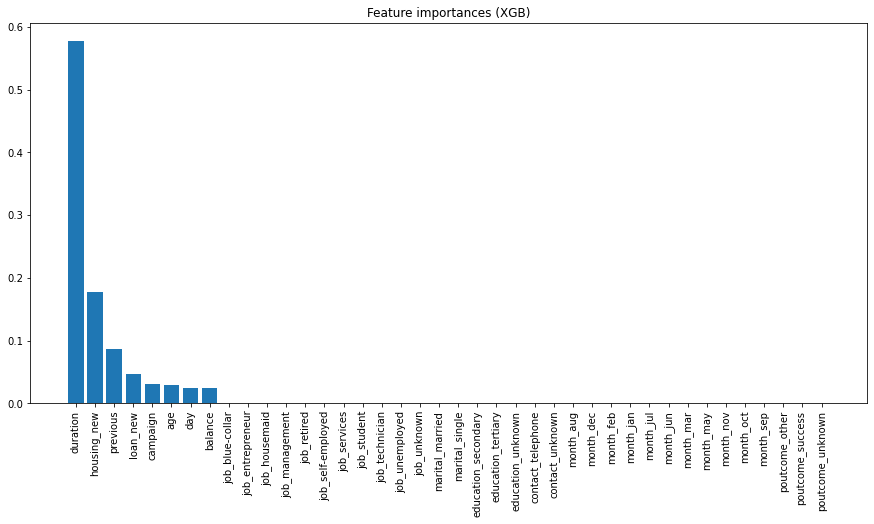

In [76]:
headers = ['name','score']
values = sorted(zip(x_train.columns,model_xgb.feature_importances_),key=lambda x:x[1]*-1)
xgb_feature_importances = pd.DataFrame(values,columns = headers)

fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0,len(xgb_feature_importances))
plt.bar(x_pos,xgb_feature_importances['score'])
plt.xticks(x_pos,xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(x_test))
cm

array([[141461,    218],
       [   204,    863]], dtype=int64)

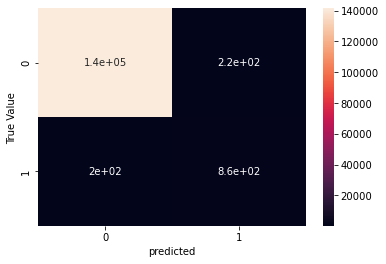

In [74]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('True Value')
plt.show()